In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
path = "./salariesCSV/ds_salaries.csv"

with open(path,"r",encoding="utf-8") as fileCsv:
    df_sal = pd.read_csv(fileCsv)


In [9]:
df_sal = df_sal.rename(columns={"work_year":"Ano","experience_level":"Experiencia","employment_type":"Funcao",
                                "job_title":"Trabalho","salary":"Salario","salary_currency":"Moeda","remote_ratio":"Proporcao Remoto",
                                "company_location":"Localizacao Emp","company_size":"Tam Organizacao",
                                "salary_in_usd":"Sal Dolar","employee_residence":"Residencia"})
df_sal

,Ano,Experiencia,Funcao,Trabalho,Salario,Moeda,Sal Dolar,Residencia,Proporcao Remoto,Localizacao Emp,Tam Organizacao
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
df_sal["Residencia"].unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH',
       'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG',
       'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY',
       'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA',
       'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL',
       'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE',
       'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU',
       'MT'], dtype=object)

In [9]:
len(df_sal["Trabalho"].unique())

93

In [52]:
df_sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Ano               3755 non-null   int64 
 1   Experiencia       3755 non-null   object
 2   Funcao            3755 non-null   object
 3   Trabalho          3755 non-null   object
 4   Salario           3755 non-null   int64 
 5   Moeda             3755 non-null   object
 6   Sal Dolar         3755 non-null   int64 
 7   Residencia        3755 non-null   object
 8   Proporção Remoto  3755 non-null   int64 
 9   Localização Emp   3755 non-null   object
 10  Tam Organizacao   3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [3]:
df_sal.describe().round(2)

,Ano,Salario,Sal Dolar,Proporção Remoto
count,3755.00,3755.00,3755.00,3755.00
mean,2022.37,190695.57,137570.39,46.27
std,0.69,671676.50,63055.63,48.59
min,2020.00,6000.00,5132.00,0.00
25%,2022.00,100000.00,95000.00,0.00
50%,2022.00,138000.00,135000.00,0.00
75%,2023.00,180000.00,175000.00,100.00
max,2023.00,30400000.00,450000.00,100.00


In [4]:
df_sal.groupby("Experiencia").count()

,Ano,Funcao,Trabalho,Salario,Moeda,Sal Dolar,Residencia,Proporção Remoto,Localização Emp,Tam Organizacao
Experiencia,,,,,,,,,,
EN,320,320,320,320,320,320,320,320,320,320
EX,114,114,114,114,114,114,114,114,114,114
MI,805,805,805,805,805,805,805,805,805,805
SE,2516,2516,2516,2516,2516,2516,2516,2516,2516,2516


In [50]:
"""EXERCICIO 1"""
df_2 = df_sal.groupby("Experiencia").count()["Funcao"].reset_index()

<Axes: xlabel='Experiencia', ylabel='Funcao'>

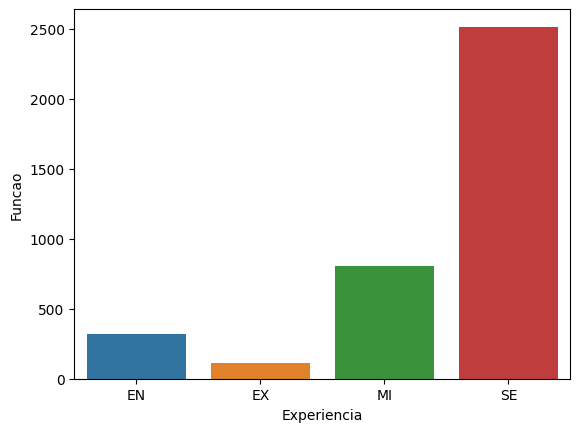

In [38]:
sns.barplot(data = df_2, x = "Experiencia", y = "Funcao")

In [42]:
df_3 = df_sal.pivot_table(index = "Experiencia", values="Salario", aggfunc="count").reset_index()
df_3

,Experiencia,Salario
0,EN,320
1,EX,114
2,MI,805
3,SE,2516


<Axes: xlabel='Experiencia', ylabel='Salario'>

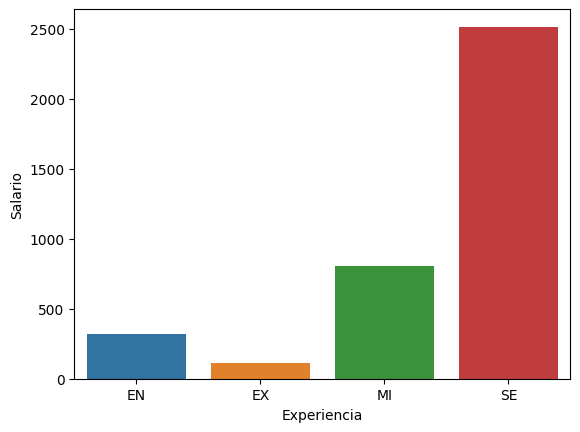

In [45]:
sns.barplot(data = df_3, x = "Experiencia", y = "Salario")

<Axes: xlabel='count', ylabel='Experiencia'>

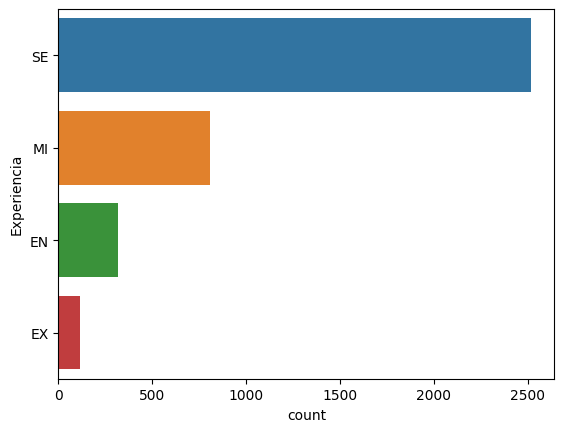

In [67]:
sns.countplot(df_sal, y = "Experiencia")

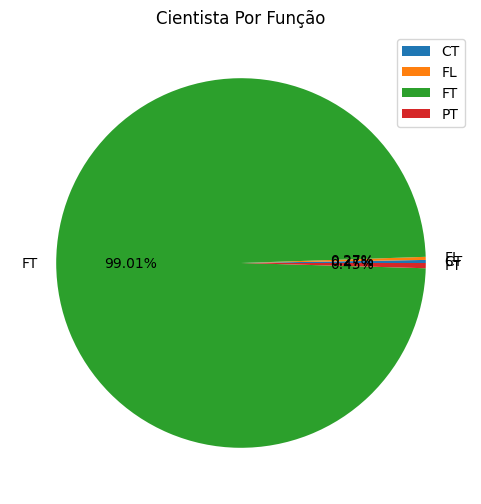

In [98]:
""" EXERCICIO 2"""
df_pizza = df_sal.groupby("Funcao").count().reset_index()
plt.figure(figsize=(6,6))
plt.title("Cientista Por Função")
plt.pie(df_pizza["Ano"], labels = df_pizza.Funcao, autopct="%1.2f%%")
plt.legend();
plt.show()



In [20]:
df_prop = df_sal.pivot_table(index = "Ano", values ="Proporcao Remoto", aggfunc="mean").reset_index()
df_prop


,Ano,Proporcao Remoto
0,2020,65.131579
1,2021,68.695652
2,2022,55.408654
3,2023,34.061625


In [11]:
vars_categ = ['experience_level', 'employment_type', 'company_size']

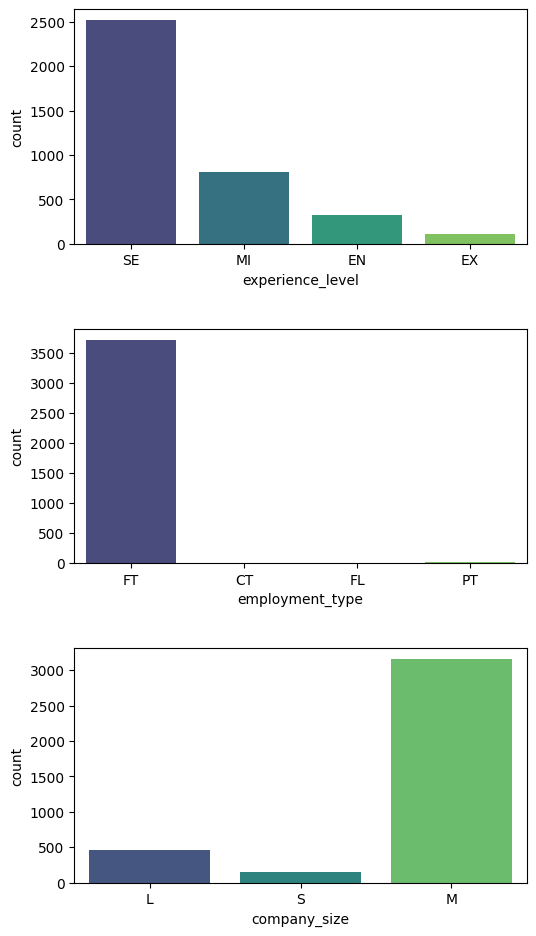

In [12]:
fig, ax = plt.subplots(3, 1, figsize=(6,10))
cont = 0

for i in range(len(vars_categ)):
    #for j in range(1):
        sns.countplot(data=df_sal, x=vars_categ[cont], ax=ax[i], palette='viridis')
        cont+=1
fig.tight_layout(pad=3.0)

<function matplotlib.pyplot.show(close=None, block=None)>

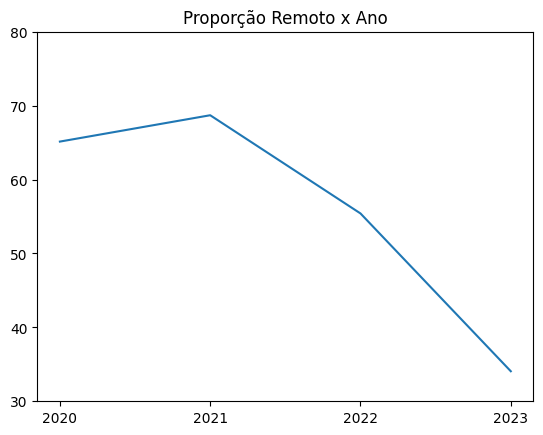

In [49]:
"""EXERCICIO 3"""
sns.lineplot(data = df_prop, x="Ano", y="Proporcao Remoto")
plt.ylim(30,80)
plt.ylabel("")
plt.xticks(df_prop["Ano"])
plt.xlabel("")
plt.title("Proporção Remoto x Ano", loc = "center")
plt.show

In [17]:
"""EXERCICIO 4   SALARIO X TAM DA ORGANIZACAO"""

df_scatter = df_sal.pivot_table(index = "Tam Organizacao", values = "Sal Dolar").reset_index()
df_scatter


,Tam Organizacao,Sal Dolar
0,L,118300.982379
1,M,143130.548367
2,S,78226.682432


<Axes: xlabel='Sal Dolar', ylabel='Tam Organizacao'>

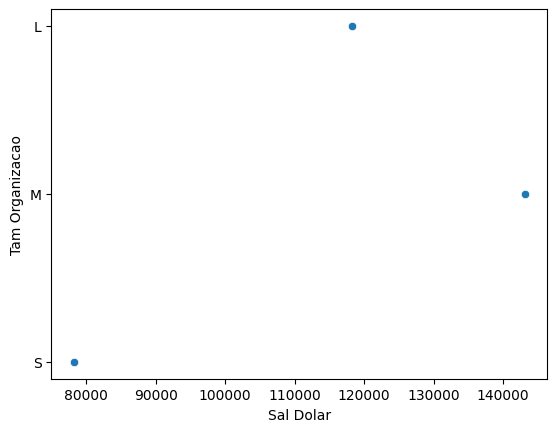

In [18]:
sns.scatterplot(data = df_scatter, x = "Sal Dolar", y = "Tam Organizacao")

In [9]:
df_top = df_sal.groupby("Residencia").count()["Sal Dolar"].nlargest(10).reset_index().rename(columns= {"Sal Dolar":"Top10"})
df_top 

,Residencia,Top10
0,US,3004
1,GB,167
2,CA,85
3,ES,80
4,IN,71
5,DE,48
6,FR,38
7,BR,18
8,PT,18
9,GR,16


In [10]:
top_Paises = df_top["Residencia"].unique() 

In [11]:
df_filtrado = df_sal.loc[df_sal["Residencia"].isin(top_Paises)]
df_filtrado

,Ano,Experiencia,Funcao,Trabalho,Salario,Moeda,Sal Dolar,Residencia,Proporcao Remoto,Localizacao Emp,Tam Organizacao
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


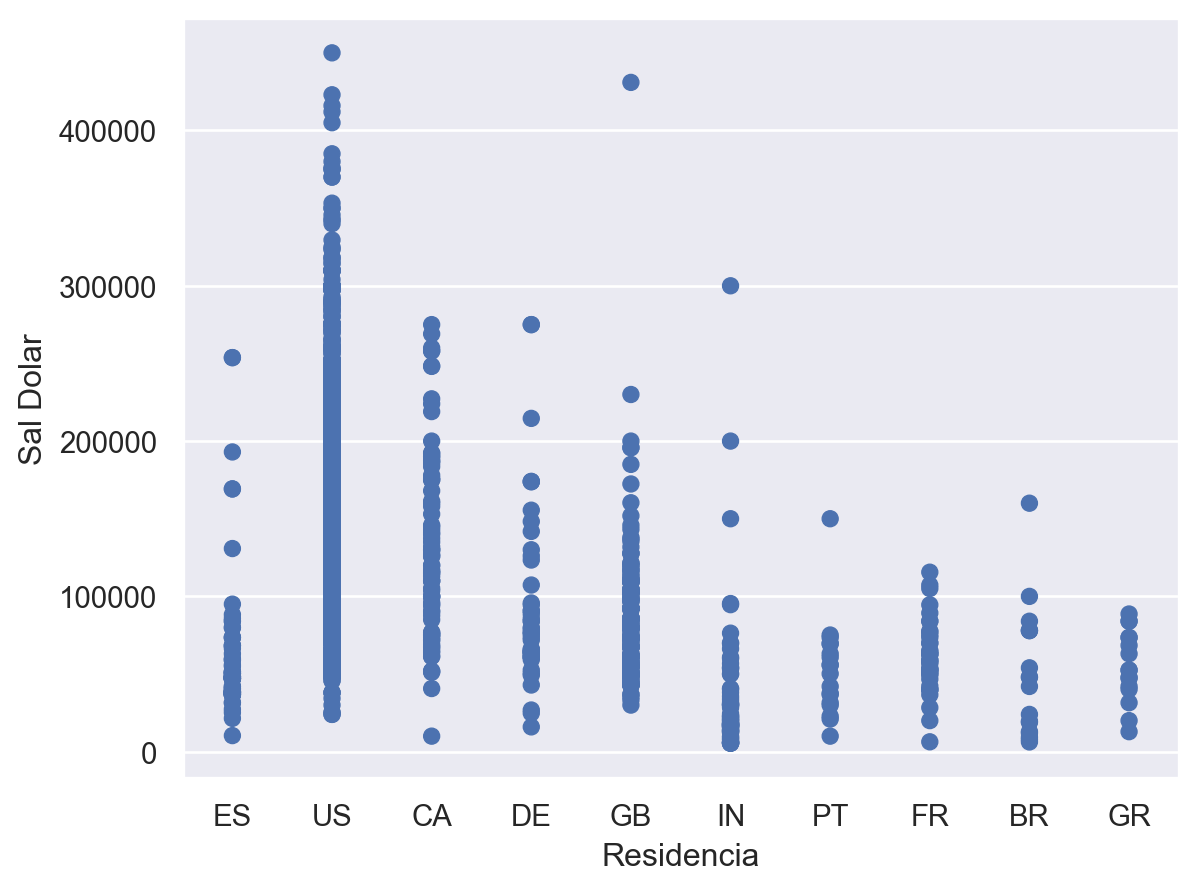

In [13]:
so.Plot(df_filtrado, y= "Sal Dolar", x="Residencia").add(so.Dot())

In [41]:
df_anos = df_sal.groupby("Ano")["Sal Dolar"].sum().reset_index()
df_anos[(df_anos["Ano"] == 2022) | (df_anos["Ano"] == 2023)]


,Ano,Sal Dolar
2,2022,221875465
3,2023,266046291


In [43]:
pd.pivot_table(df_sal["Experiencia"], aggfunc= "count")

AttributeError: 'Series' object has no attribute 'columns'